In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
import seaborn as sns

In [2]:
# Wczytanie danych 
df = pd.read_csv('dane2.csv', sep=';')

In [3]:
df

,Year,Revenue,Expenses,Operatating profit,Financial items,Profit before tax,Net profit
0,2022,64.647,46.726,17.921,0.245,17.676,13.782
1,2021,55.294,38.250,17.044,0.039,17.005,13.285
2,2020,43.656,30.744,12.912,0.412,12.500,9.916
3,2019,38.544,27.707,10.837,0.085,10.752,8.306
4,2018,36.391,25.617,10.774,0.264,10.510,8.076
5,2017,34.995,24.636,10.359,0.158,10.201,7.806
6,2016,37.934,25.486,12.448,0.057,12.391,9.436
7,2015,35.780,23.536,12.244,0.096,12.148,9.174
8,2014,28.578,18.881,9.697,0.206,9.491,7.025
9,2013,25.294,16.958,8.336,0.097,8.239,6.119


In [4]:
# Pomniejszenie Dataframe
df1 = df[['Year', 'Revenue', 'Expenses']]

In [5]:
df1

,Year,Revenue,Expenses
0,2022,64.647,46.726
1,2021,55.294,38.250
2,2020,43.656,30.744
3,2019,38.544,27.707
4,2018,36.391,25.617
5,2017,34.995,24.636
6,2016,37.934,25.486
7,2015,35.780,23.536
8,2014,28.578,18.881
9,2013,25.294,16.958


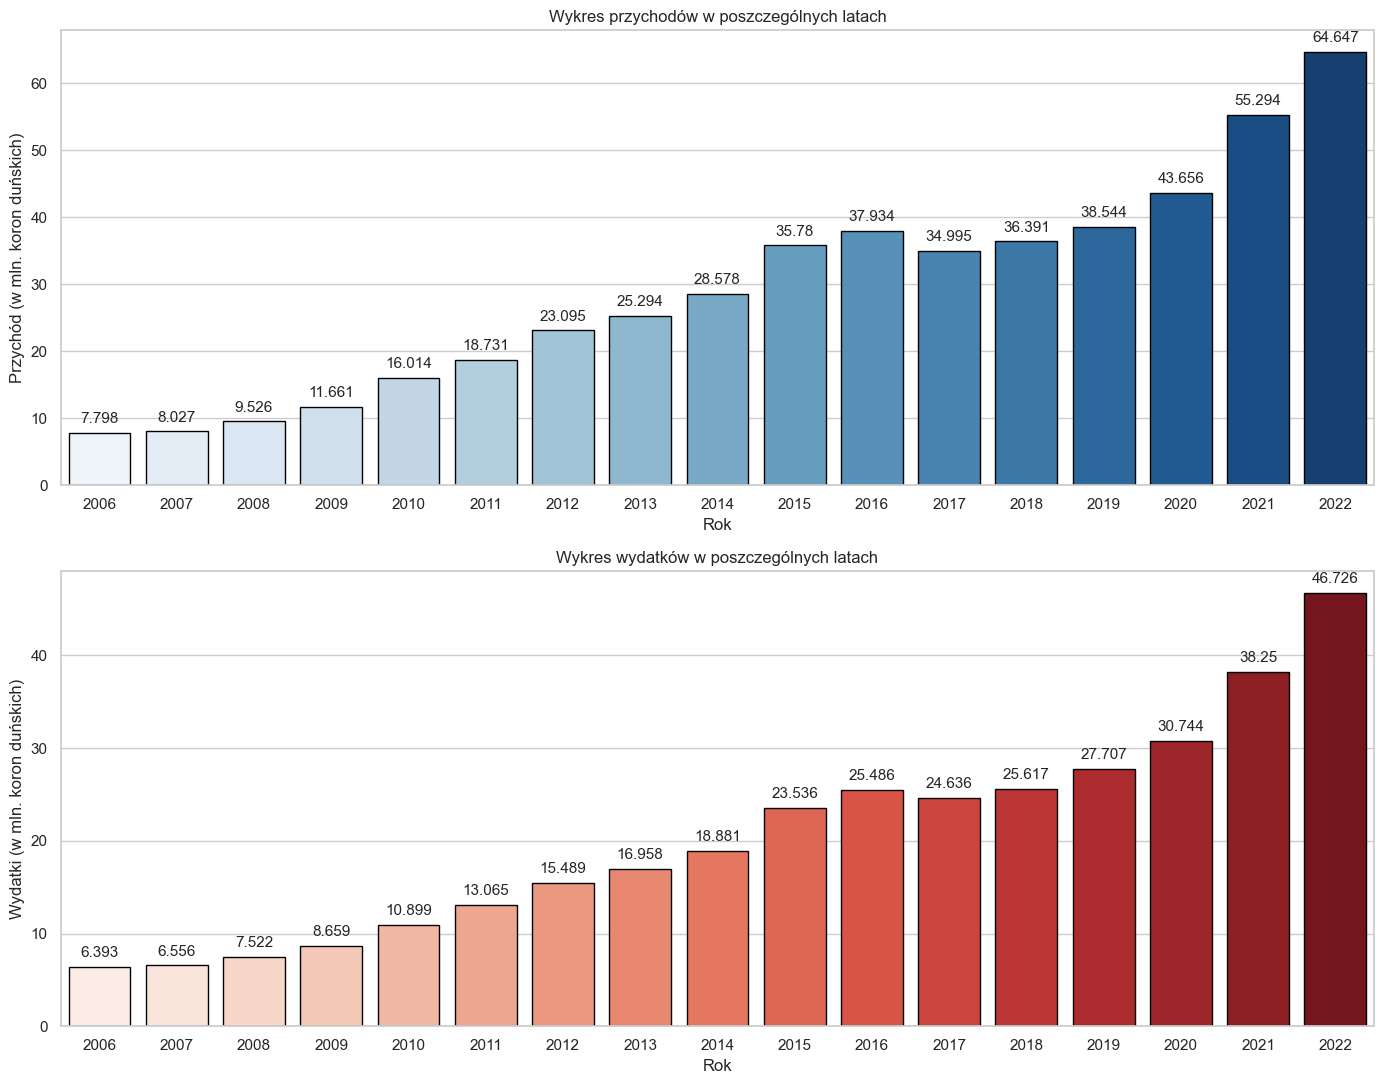

In [6]:
# Ustawienie stylu wykresów (biała siatka)
sns.set(style="whitegrid")

# Stworzenie wykresu oraz subplotów w układzie kolumnowym oraz aby każdy wykres miał własną oś OX
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 11), sharex=False)

# Wykres przychodów
revenue_bar = sns.barplot(x='Year', y='Revenue', data=df, palette="Blues", ax=ax1, edgecolor='black')
ax1.set_ylabel('Przychód (w mln. koron duńskich)')
ax1.set_xlabel('Rok')
ax1.set_title('Wykres przychodów w poszczególnych latach')

# Dodanie tekstu nad każdym słupkiem z liczbą przychodów
# Pętla iteruje przez każdy słupkowy element tzw. "patch" przy zmiennej p
# f'{p.get_height()}' - tekst etykiety danego słupka, który sie pojawi. 
# (p.get_x() + p.get_width() / 2., p.get_height()) - są to współrzędne gdzie ma sie pojawić etykieta
#   - współrzędna x-owa to połowa szerokości słupka, czyli jego środek
#   - współrzędna y-owa to wysokość słupka
# ha='center', va='center' - pozycja horyzontalna i pionowa. Ustawiamy "center" aby tekst był na środku
# textcoords='offset points' - określenie, że "xytext" są przysunięciem puntków
# xytext=(0, 10) - określenie przysunięcia etykiety od punktu anotacji, czyli o 10 punktów w góre
for p in revenue_bar.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', textcoords='offset points', xytext=(0, 10), fontsize = 11)

    
# Dodanie tekstu nad każdym słupkiem z liczbą wydatków
expenses_bar = sns.barplot(x='Year', y='Expenses', data=df, palette="Reds", ax=ax2, edgecolor='black')
ax2.set_ylabel('Wydatki (w mln. koron duńskich)')
ax2.set_xlabel('Rok')
ax2.set_title('Wykres wydatków w poszczególnych latach')

# Dodanie tekstu nad każdym słupkiem z liczbą wydatków
for p in expenses_bar.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11)

# Dostowanie układu dla odpowiedniego rozłożenia etykiet i tytułów
plt.tight_layout()

plt.savefig('Wykres przychodów i wydatków w poszczególnych latach.pdf')

plt.show()